In [1]:
## 加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## 图像在jupyter notebook中显示
%matplotlib inline
## 显示的图片格式（mac中的高清格式），还可以设置为"bmp"等格式
%config InlineBackend.figure_format = "retina"
## 输出图显示中文
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")

## 模型训练技巧

**K折交叉验证**

**参数网格搜索**

**训练集、验证集、测试集**



In [2]:
## 读取鸢尾花数据集
Iris = load_iris()
Iris.data.shape

(150, 4)

In [3]:
Iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

####  k-折交叉验证
1:k-fold

将样例划分为K份，若K=样例数，即为留一交叉验证，K-1份作为训练。

2:Stratified k-fold  分层交叉验证

StratifiedKFold()这个函数较常用，比KFold的优势在于将k折数据按照百分比划分数据集，每个类别百分比在训练集和测试集中都是一样，这样能保证不会有某个类别的数据在训练集中而测试集中没有这种情况，同样不会在训练集中没有全在测试集中，这样会导致结果糟糕透顶。

In [4]:
## 1:使用k－fold对Iris数据集分类
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Irkf = KFold(n_splits=10,random_state=2)
## 使用 线性判别分析算法进行数据分类
LDA_clf = LinearDiscriminantAnalysis(n_components=2)
scores = []
for ii,(train_index, test_index) in enumerate(Irkf.split(Iris.data)):
    ## 训练模型
    LDA_clf.fit(Iris.data[train_index],Iris.target[train_index])
    ## 测试模型效果
    prey = LDA_clf.predict(Iris.data[test_index])
    acc = metrics.accuracy_score(Iris.target[test_index],prey)
    print("Fold:",ii+1,"Acc:",np.round(acc,4))
    scores.append(acc)
## 计算准确率的平均值
print("平均Acc:",np.mean(scores))

Fold: 1 Acc: 1.0
Fold: 2 Acc: 1.0
Fold: 3 Acc: 1.0
Fold: 4 Acc: 1.0
Fold: 5 Acc: 0.9333
Fold: 6 Acc: 0.9333
Fold: 7 Acc: 1.0
Fold: 8 Acc: 1.0
Fold: 9 Acc: 0.8
Fold: 10 Acc: 1.0
平均Acc: 0.9666666666666668


In [5]:
## 同时sklearn还提供了cross_val_score函数直接计算平均得分
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=LDA_clf,cv=10,
                         X=Iris.data,y = Iris.target,
                         n_jobs = 4)
print("10折交叉验证的Acc:\n",scores)
print("平均Acc:",np.mean(scores))

10折交叉验证的Acc:
 [1.         1.         1.         1.         0.93333333 1.
 0.86666667 1.         1.         1.        ]
平均Acc: 0.9800000000000001


In [6]:
## 2:Stratified k-fold 分层交叉验证
from sklearn.model_selection import StratifiedKFold
Skf_ir = StratifiedKFold(n_splits=3,random_state=2)
scores = []
## 使用Skf_ir.split()时需要同时提供X和Y
for ii,(train_index, test_index) in enumerate(Skf_ir.split(Iris.data,Iris.target)):
    ## 训练模型
    LDA_clf.fit(Iris.data[train_index],Iris.target[train_index])
    ## 测试模型效果
    prey = LDA_clf.predict(Iris.data[test_index])
    acc = metrics.accuracy_score(Iris.target[test_index],prey)
    print("每个测试集的类别比例:\n",pd.value_counts(Iris.target[test_index]))
    scores.append(acc)
## 计算准确率的平均值
print("平均Acc:",np.mean(scores))

每个测试集的类别比例:
 2    17
1    17
0    17
dtype: int64
每个测试集的类别比例:
 2    17
1    17
0    17
dtype: int64
每个测试集的类别比例:
 2    16
1    16
0    16
dtype: int64
平均Acc: 0.9803921568627452


### 参数网格搜索

In [7]:
## 切分数据集
train_x,test_x,train_y,test_y = train_test_split(Iris.data,Iris.target,
                                                 test_size = 0.25,random_state = 2)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
## 定义模型流程
pipe_KNN = Pipeline([("scale",StandardScaler()),
                    ("KNN",KNeighborsClassifier())])
## 定义需要搜索的参数
n_neighbors = np.arange(1,10)
para_grid = [{"scale__with_mean":[True,False],
#               "scale__with_std":[True,False],
              "KNN__n_neighbors" : n_neighbors}]

## 应用到数据上
gs_KNN_ir = GridSearchCV(estimator=pipe_KNN,param_grid=para_grid,
                         cv=10,n_jobs=4)
gs_KNN_ir.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('KNN',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=Fal

In [9]:
## 输出最优的参数
gs_KNN_ir.best_params_

{'KNN__n_neighbors': 9, 'scale__with_mean': True}

In [18]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_KNN__n_neighbors', 'param_scale__with_mean', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [21]:
## 将输出的所有搜索结果进行处理
results = pd.DataFrame(gs_KNN_ir.cv_results_)
## 输出感兴趣的结果
results2 = results[["mean_test_score","std_test_score","params"]]
results2

,mean_test_score,std_test_score,params
0,0.928571,0.078127,"{'KNN__n_neighbors': 1, 'scale__with_mean': True}"
1,0.928571,0.078127,"{'KNN__n_neighbors': 1, 'scale__with_mean': Fa..."
2,0.928571,0.066936,"{'KNN__n_neighbors': 2, 'scale__with_mean': True}"
3,0.928571,0.066936,"{'KNN__n_neighbors': 2, 'scale__with_mean': Fa..."
4,0.928571,0.066936,"{'KNN__n_neighbors': 3, 'scale__with_mean': True}"
5,0.928571,0.066936,"{'KNN__n_neighbors': 3, 'scale__with_mean': Fa..."
6,0.919643,0.062744,"{'KNN__n_neighbors': 4, 'scale__with_mean': True}"
7,0.919643,0.062744,"{'KNN__n_neighbors': 4, 'scale__with_mean': Fa..."
8,0.937500,0.069746,"{'KNN__n_neighbors': 5, 'scale__with_mean': True}"
9,0.937500,0.069746,"{'KNN__n_neighbors': 5, 'scale__with_mean': Fa..."


In [15]:
## 获取最好的模型
Iris_clf = gs_KNN_ir.best_estimator_
## 用来预测
prey = Iris_clf.predict(test_x)
print("Acc:",metrics.accuracy_score(test_y,prey))

Acc: 1.0


#### 训练集、验证集、测试集

数据分成3份

## 分类模型的结果评估

**混淆矩阵**

**F1得分等**

**AUC和ROC曲线**

In [22]:
pd.value_counts(test_y)

0    16
2    11
1    11
dtype: int64

In [23]:
## 输出混淆矩阵，并且可视化
metrics.confusion_matrix(test_y,prey)

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]])

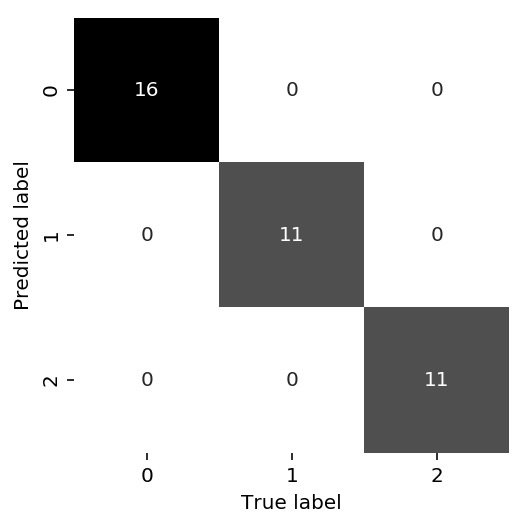

In [24]:
## 混淆矩阵可视化
confm = metrics.confusion_matrix(test_y,prey)
sns.heatmap(confm.T, square=True, annot=True, fmt='d', 
            cbar=False,cmap=plt.cm.gray_r)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [25]:
print(metrics.classification_report(test_y,prey))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### AUC和ROC曲线

## 回归分析的评价指标

**R-squared**

**P值**

**条件数**

等

## 聚类分析效果评价

